<a href="https://colab.research.google.com/github/KevinRivas13/Actividades-IA/blob/main/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AF7: Redes Neuronales Artificiales**

Grupo:013 Hora:N4-N6

Emiliano Alberto Gomar Valdez 2006043
Kevin Alejandro Rivas Montoya 2015346
Jareth Alejandro Giacoman Vallejo 1758554
Erick Tadeo Hernández Soto 2038847

1. Importar librerías

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Cargar datos

In [2]:
train_images = x_train.reshape((60_000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = x_test.reshape((10_000, 28 * 28))
test_images = test_images.astype('float32') / 255

3. Preprocesamiento de datos

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
model = Sequential([
    Input(shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

4. Selección y entrenamiento del modelo

In [4]:
model.fit(train_images, y_train, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7815 - loss: 0.6388
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9587 - loss: 0.1379
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9709 - loss: 0.0976
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0791
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0664
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0552
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0438
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0356
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0352
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0287
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0256
Epoch 12/25
1875/1875 ━━━━━━━━

In [6]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9760 - loss: 0.1447

Test accuracy: 0.9760000109672546


5. Prueba del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


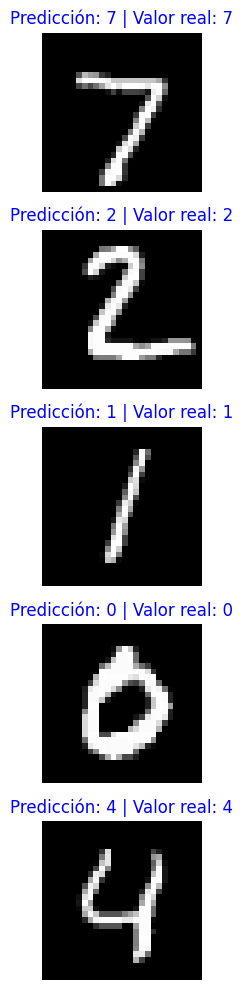

In [14]:
predictions = model.predict(test_images)
def mostrar_predicciones(n=5):
    plt.figure(figsize=(10, 2 * n))
    for i in range(n):
        imagen = x_test[i].reshape(28, 28)
        entrada = test_images[i].reshape(1, 784)
        pred = model.predict(entrada)
        prediccion = np.argmax(pred)
        etiqueta_real = y_test[i]
        color = 'blue' if prediccion == etiqueta_real else 'red'
        plt.subplot(n, 1, i + 1)
        plt.imshow(imagen, cmap='gray')
        plt.title(f"Predicción: {prediccion} | Valor real: {etiqueta_real}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
mostrar_predicciones(5)